In [1]:
import numpy as np
import pandas as pd 

data=pd.read_csv('datasets/Sleep_health_and_lifestyle_dataset.csv')

data[['Blood_Pressure1', 'Blood_Pressure2']] = data['Blood Pressure'].str.split('/', expand=True).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Blood_Pressure1          374 non-null    int32  
 14  Blood_Pressure2          3

In [2]:
from sklearn.preprocessing import MinMaxScaler
ohe=pd.get_dummies(data[['Gender', 'Occupation', 'BMI Category']]).astype(int)
for i in range(5):
    data.loc[(data.Age >= 27+(i*8)) & (data.Age < 27+(i*8)+8), 'AgeGroup'] = i
data.drop(columns=['Gender', 'Occupation', 'BMI Category', 'Age'], inplace=True)
data=pd.concat([data, ohe], axis = 1)

MMS = MinMaxScaler()
data[['Sleep Duration', 'Quality of Sleep','Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood_Pressure1', 'Blood_Pressure2']]=MMS.fit_transform(data[['Sleep Duration', 'Quality of Sleep','Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood_Pressure1', 'Blood_Pressure2']])
data

,Person ID,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood_Pressure1,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,0.111111,0.4,0.20,0.6,126/83,0.571429,0.171429,None,0.407407,...,0,0,0,0,1,0,0,0,0,1
1,2,0.148148,0.4,0.50,1.0,125/80,0.476190,1.000000,None,0.370370,...,0,0,0,0,0,0,1,0,0,0
2,3,0.148148,0.4,0.50,1.0,125/80,0.476190,1.000000,None,0.370370,...,0,0,0,0,0,0,1,0,0,0
3,4,0.037037,0.0,0.00,1.0,140/90,0.952381,0.000000,Sleep Apnea,0.925926,...,0,1,0,0,0,0,0,0,1,0
4,5,0.037037,0.0,0.00,1.0,140/90,0.952381,0.000000,Sleep Apnea,0.925926,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0.851852,1.0,0.75,0.0,140/95,0.142857,0.571429,Sleep Apnea,0.925926,...,1,0,0,0,0,0,0,0,0,1
370,371,0.814815,1.0,0.75,0.0,140/95,0.142857,0.571429,Sleep Apnea,0.925926,...,1,0,0,0,0,0,0,0,0,1
371,372,0.851852,1.0,0.75,0.0,140/95,0.142857,0.571429,Sleep Apnea,0.925926,...,1,0,0,0,0,0,0,0,0,1
372,373,0.851852,1.0,0.75,0.0,140/95,0.142857,0.571429,Sleep Apnea,0.925926,...,1,0,0,0,0,0,0,0,0,1


In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

def eval_model(y_true,y_predicted):
    cm = confusion_matrix(y_true, y_predicted) 
    cm_display=ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    print('accuracy score',accuracy_score(y_true, y_predicted))
    print(classification_report(y_true,y_predicted))

In [4]:
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras
X=data.drop(columns=['Person ID','Sleep Disorder','Blood Pressure'])
y=data['Sleep Disorder']

encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(y)
y = keras.utils.to_categorical(encoded_Y)
y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [6]:

model = keras.models.Sequential()
model.add(keras.layers.Dense(32, input_shape=(X.shape[1],),activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer='Adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()
history=model.fit(X_train,y_train,epochs=15,validation_split=.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                864       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2019 (7.89 KB)
Trainable params: 2019 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
8/8 [==============================] - 1s 24ms/step - loss: 1.2609 - accuracy: 0.2218 - val_loss: 1.1929 - val_accuracy: 0.1833
Epoch 2/15
8/8 [==============================] - 0s 4ms/step - loss: 1.1366 - accuracy: 0.2385 - val_loss: 1.0846 - val_accuracy: 0.3500
Epoch 3/15


In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

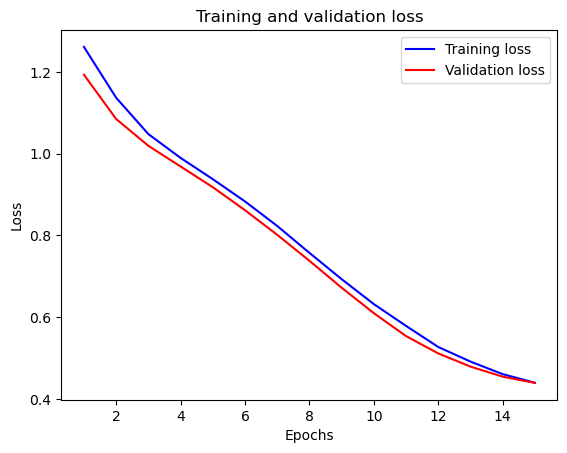

In [9]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

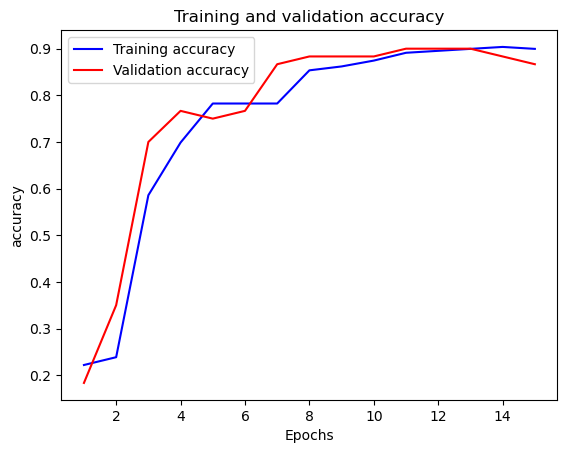

In [10]:
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, accuracy_values, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy_values, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

3/3 [==============================] - 0s 1ms/step
accuracy score 0.88
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.86      0.98      0.91        43
           2       0.89      0.89      0.89        19

    accuracy                           0.88        75
   macro avg       0.92      0.80      0.84        75
weighted avg       0.89      0.88      0.87        75



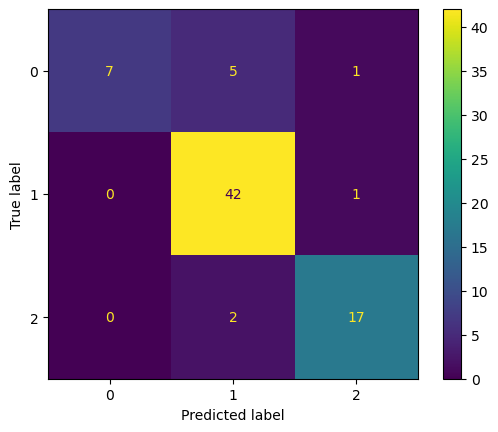

In [11]:
y_predicted=model.predict(X_test)
y_pred_labels = np.argmax(y_predicted, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
eval_model(y_test_labels,y_pred_labels)